- 导入必须的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- 读取多个表数据，以列表形式装载多个DataFrame

In [2]:
gold_1 = pd.read_csv('中国黄金价格/实物黄金价格_基础金价.csv')
gold_2 = pd.read_csv('中国黄金价格/实物黄金价格_零售价.csv')
gold_3 = pd.read_csv('中国黄金价格/实物黄金价格_回收价.csv')
df_list = [gold_1, gold_2, gold_3]
df_list

[            Date BrandName ProductName  Price PriceUnit RaiseDownType
 0     2018-04-02      中国黄金        基础金价  271.4       元/克             涨
 1     2018-03-30      中国黄金        基础金价  270.7       元/克             跌
 2     2018-03-29      中国黄金        基础金价  271.8       元/克             跌
 3     2018-03-28      中国黄金        基础金价  274.2       元/克             跌
 4     2018-03-26      中国黄金        基础金价  275.9       元/克             涨
 ...          ...       ...         ...    ...       ...           ...
 2457  2015-07-17      中国黄金        基础金价  230.4       元/克             平
 2458  2015-07-16      中国黄金        基础金价  230.4       元/克             跌
 2459  2015-07-15      中国黄金        基础金价  232.6       元/克             涨
 2460  2015-07-14      中国黄金        基础金价  232.5       元/克             跌
 2461  2015-07-13      中国黄金        基础金价  233.6       元/克             涨
 
 [2462 rows x 6 columns],
             Date BrandName ProductName  Price PriceUnit RaiseDownType
 0     2013-08-12      中国黄金         零售价  280.5   

- 合并数据到一个DataFrame

In [3]:
gold = pd.concat([gold_1, gold_2, gold_3], axis=0)
gold.head()

,Date,BrandName,ProductName,Price,PriceUnit,RaiseDownType
0,2018-04-02,中国黄金,基础金价,271.4,元/克,涨
1,2018-03-30,中国黄金,基础金价,270.7,元/克,跌
2,2018-03-29,中国黄金,基础金价,271.8,元/克,跌
3,2018-03-28,中国黄金,基础金价,274.2,元/克,跌
4,2018-03-26,中国黄金,基础金价,275.9,元/克,涨


- 数据预处理
  - 将Date转换成日期类型
  - 将Date设置为index
  - 将index升序排列

In [4]:
gold['Date'] = pd.to_datetime(gold.Date)
gold.set_index('Date', inplace=True)
gold.sort_index(inplace=True)
gold.head()

,BrandName,ProductName,Price,PriceUnit,RaiseDownType
Date,,,,,
2012-02-17,中国黄金,回收价,350.0,元/克,涨
2012-02-17,中国黄金,基础金价,352.0,元/克,涨
2012-02-17,中国黄金,零售价,364.0,元/克,涨
2012-02-20,中国黄金,基础金价,353.0,元/克,涨
2012-02-20,中国黄金,回收价,351.0,元/克,涨


- 根据RaiseDownType列的涨跌情况， 设置涨跌标志并添加新列， 涨1跌2平3

In [5]:
gold['ChangeFlag'] = gold.RaiseDownType.apply(
    lambda x: '1' if x == '涨' else ('2' if x == '跌' else '3'))
gold.head()

,BrandName,ProductName,Price,PriceUnit,RaiseDownType,ChangeFlag
Date,,,,,,
2012-02-17,中国黄金,回收价,350.0,元/克,涨,1
2012-02-17,中国黄金,基础金价,352.0,元/克,涨,1
2012-02-17,中国黄金,零售价,364.0,元/克,涨,1
2012-02-20,中国黄金,基础金价,353.0,元/克,涨,1
2012-02-20,中国黄金,回收价,351.0,元/克,涨,1


- 统计各年度不同ProductName的“涨跌平”的平均价和次数

In [6]:
gold_group = gold.groupby(by=[gold.index.year, 'ProductName', 'RaiseDownType']).agg(
    {'Price': 'mean', 'ChangeFlag': 'count'})
gold_group.head()

Price  ChangeFlag
Date ProductName RaiseDownType                        
2012 回收价         平              334.375000           8
                 涨              338.370000         110
                 跌              336.243564         101
     基础金价        平              336.375000           8
                 涨              340.470642         109

- 提取某年某月的ProductName数据
- 绘制简单的折线图

In [7]:
gold_2021 = gold.loc[(gold.index.year == 2021) & (
    gold.index.month == 9) & (gold.ProductName == '零售价')]
gold_2021

,BrandName,ProductName,Price,PriceUnit,RaiseDownType,ChangeFlag
Date,,,,,,
2021-09-01,中国黄金,零售价,391.4,元/克,跌,2
2021-09-02,中国黄金,零售价,391.4,元/克,平,3
2021-09-03,中国黄金,零售价,391.3,元/克,跌,2
2021-09-06,中国黄金,零售价,394.2,元/克,涨,1
2021-09-07,中国黄金,零售价,393.7,元/克,跌,2
2021-09-08,中国黄金,零售价,389.1,元/克,跌,2
2021-09-09,中国黄金,零售价,386.6,元/克,跌,2
2021-09-10,中国黄金,零售价,387.7,元/克,涨,1
2021-09-13,中国黄金,零售价,387.0,元/克,跌,2


<AxesSubplot:title={'center':'Gold_Price'}, xlabel='Date', ylabel='Price'>

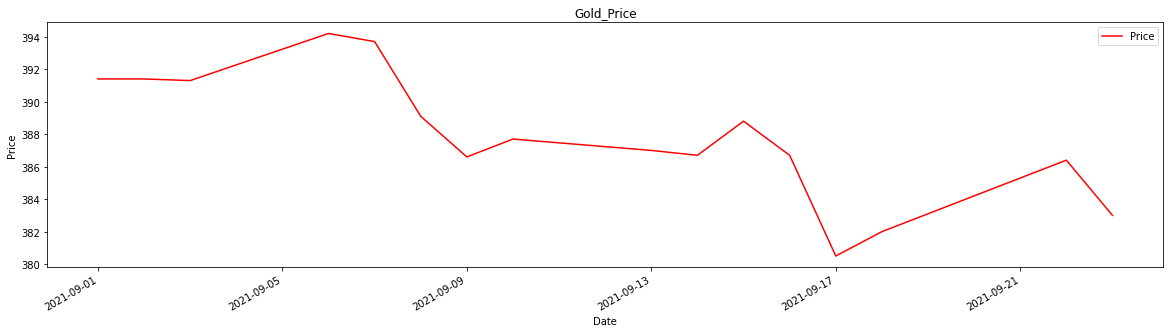

In [8]:
gold_2021.plot(title='Gold_Price', color='red',
               xlabel='Date', ylabel='Price', figsize=(20, 5))